# Portefolio Optimization in a CAPM framework

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pypfopt as opt
import plotly.graph_objs as go
from pypfopt import plotting
from pypfopt import expected_returns

In [7]:
#This part can be run, if you don't have the packages that we describe in the README-file
"pip install matplotlib-venn"
"pip install yahoo_fin"
"pip install PyPortfolioOpt"

'pip install PyPortfolioOpt'

In [8]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
from eeff import eeff


In [9]:
%reload_ext eeff

# Read and Explore data

Here we import our data. We use and API to download data from Yahoo Finance. 
We import stock data (adj. close) from 20 US companies. The adj. close is plotted in an interactive plot to inspect the data.

In [10]:
eeff.downint()

[*********************100%***********************]  20 of 20 completed


Overall there seem to be a up-going trend in the stock prices. However - escpecially in 2020 - there seem to be some kind of dip. If you zoom in around Mar. 15. 2020 you can see, that all the stocks goes down in price around here due to COVID. 
Besides from that the plot serves more as a way to inspect that data looks nice and is ready to be analysed. 

# Analysis

We are intrested in calculating the Sharpe Ratio of an optimal portefolio with the 20 companies from above. First we compute the "normal" co-variance between all 20 companies and after the covariance using the Ledoit-Wolf shrinkage. Both colour coded covariance matrixes (20x20) can be seen.
In short the Ledoit-Wolf shrinkage is used to get more reliable covarinaces, as the covariance can be unreliable, when opporeting in high dimensions unless you have enormous amounts of datapoints. 

[*********************100%***********************]  20 of 20 completed


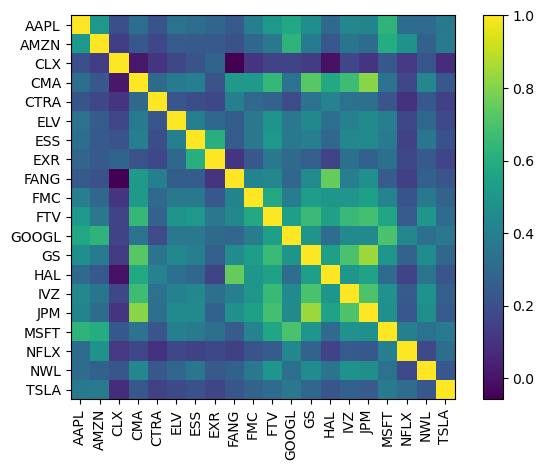

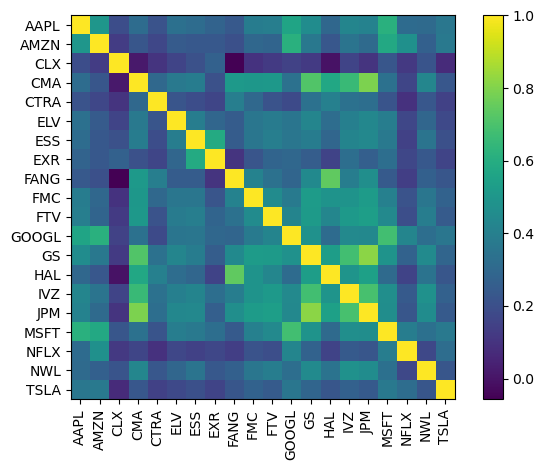

In [11]:
import pypfopt
pypfopt.__version__
#Covariance
from pypfopt import risk_models
from pypfopt import plotting
eeff.cov()

Now we calculate the expexted returns and plot them for all the companies:

[*********************100%***********************]  20 of 20 completed


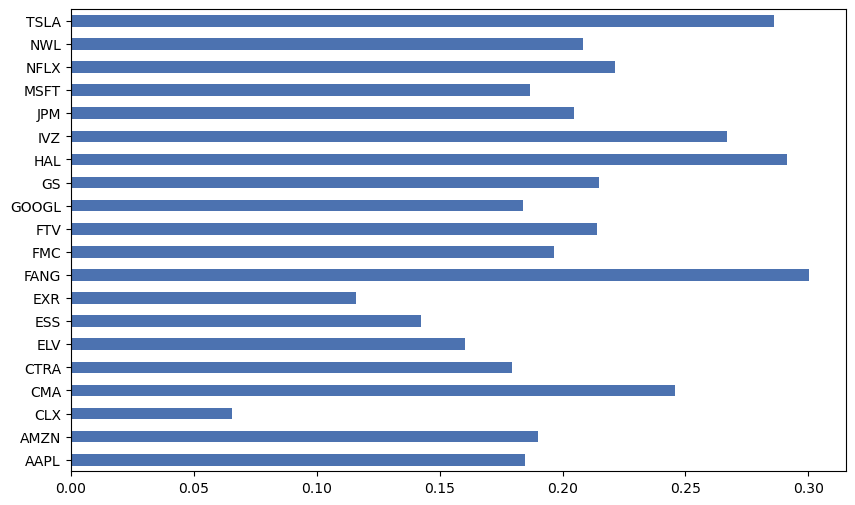

In [12]:
eeff.expected_returns()

The last thing we need to do now is to compute the efficient frontier of the portefolie. We do this and plot it together with the expected return, sharpe ratio, and volatility of the 20 different companies:

[*********************100%***********************]  20 of 20 completed
Annual volatility: 14.5%
Expected annual return: 19.6%
Annual volatility: 17.9%
Sharpe Ratio: 0.98


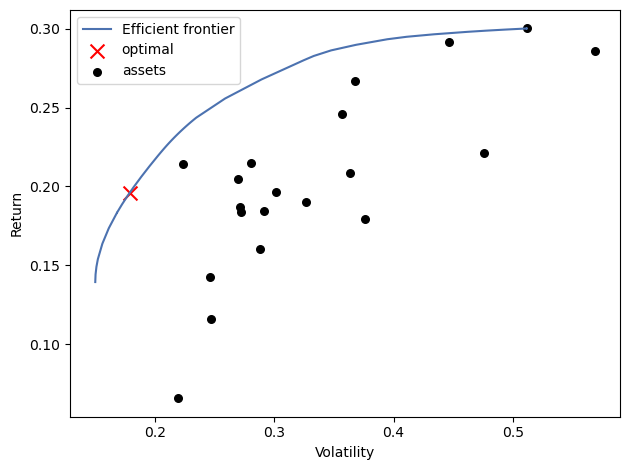

In [13]:
eeff.efficientfrontier()

For the fun of it, we produce a plot that shows the efficent frontier and how 1.000.000 random portefolies perform on return and volatility. Note that this takes around 14s to run, as constructing and plotting 1.000.000 portefolies takes some time:). 

[*********************100%***********************]  20 of 20 completed
Annual volatility: 14.5%
Expected annual return: 19.6%
Annual volatility: 17.9%
Sharpe Ratio: 0.98
Sample portfolio returns: [0.20482106 0.19783756 0.20250369 ... 0.19459532 0.1947244  0.19751093]
Sample portfolio volatilities: 0         0.212844
1         0.201923
2         0.204963
3         0.216978
4         0.228998
            ...   
999995    0.210085
999996    0.199123
999997    0.208283
999998    0.197096
999999    0.187420
Length: 1000000, dtype: float64


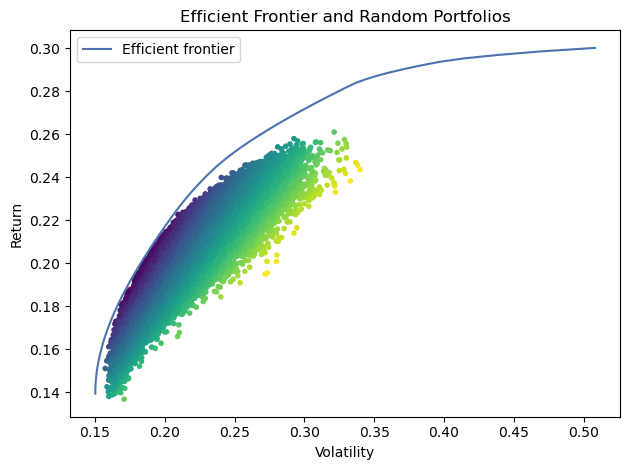

In [14]:
eeff.random_portefolios()

# Conclusion

Overall we have made an analysis on a 20 compani portefolio in a simpel CAPM-framework. The data is dowloaded from Yahoo finance with an API and analysed using code from the eeff-python file. 
Our portefolio shows a rather high anual expected return. The reason for this is probably some selection bias, as we have just choosen the first 20 companies that came to our mind. As some of the companies like Tesla, Apple and Amazon has done really good over the last 10 years. 